In [1]:
import pandas as pd
import numpy as np
import re
import itertools
import csv
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

pd.set_option('display.max_columns', 500)

train = pd.read_csv("train_2021.csv", dtype={"zip_code" : object})
test = pd.read_csv("test_2021.csv", dtype={"zip_code" : object})
# train_data = pd.read_csv("../data/raw_train_data.csv", dtype={"zip_code" : object})
# test_data = pd.read_csv("../data/raw_test_data.csv", dtype={"zip_code" : object})

In [2]:
train.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [3]:
test.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,12002.000000,12002.000000,12000.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,11914.000000,12002.000000,12002.000000,11988.000000,11999.000000,12002.000000,12002.000000
mean,15045.335111,43.525162,0.715167,73.702966,37331.504833,0.698134,0.576737,0.494918,0.238711,49.770122,0.601066,5016.502211,4.969331,22925.335594,22860.701764
std,8661.251912,12.201298,0.451354,15.378967,2926.069309,0.459087,0.494097,0.956002,0.426313,33.581191,0.489699,2257.041870,2.227267,12108.888412,12198.142508
min,2.000000,19.000000,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,471.363743,0.000000,2261.507903,2583.428985
25%,7532.250000,35.000000,0.000000,66.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,3367.182392,3.000000,14087.559950,13832.434587
50%,15055.500000,43.000000,1.000000,76.000000,37606.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4673.058955,5.000000,20642.029325,20508.293695
75%,22559.500000,51.000000,1.000000,85.000000,39313.000000,1.000000,1.000000,1.000000,0.000000,82.000000,1.000000,6295.292309,6.000000,29293.641235,29205.553660
max,29998.000000,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,14.000000,106991.684500,101818.964200


It could be seen from the dataset summary that **age_of_driver** has values larger than 100, **annual_income** has a value of -1, and **fraud** has values that are -1. These values should be set as missing values.

In [4]:
train.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

From the summary above, the dataset also has some missing values in  
**marital_stats,witness_present_ind,claim_est_payout,age_of_vehivle**

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

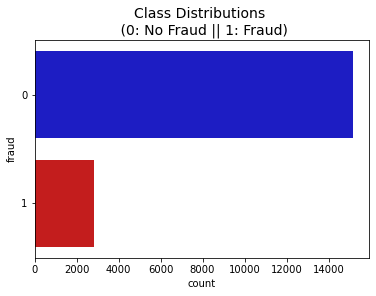

In [5]:
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
sns.countplot(y='fraud', data=train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [6]:
## fraud
train = train[train.fraud != -1]

## annual_income
train.loc[train.annual_income==-1, 'annual_income'] = np.nan
test.loc[test.annual_income==-1, 'annual_income'] = np.nan

## age_of_driver
train.loc[train.age_of_driver>100, 'age_of_driver'] = np.nan
test.loc[test.age_of_driver>100, 'age_of_driver'] = np.nan

## Encode Categorical Variables

In [7]:
# set claim_number as index:
train = train.set_index('claim_number')
test = test.set_index('claim_number')


In [8]:
train["marital_status"] = pd.Categorical(train["marital_status"])
train["high_education_ind"] = pd.Categorical(train["high_education_ind"])
train["address_change_ind"] = pd.Categorical(train["address_change_ind"])
train["zip_code"] = pd.Categorical(train["zip_code"])
train["witness_present_ind"] = pd.Categorical(train["witness_present_ind"])
train["policy_report_filed_ind"] = pd.Categorical(train["policy_report_filed_ind"])
train["fraud"] = pd.Categorical(train["fraud"])

test["marital_status"] = pd.Categorical(test["marital_status"])
test["high_education_ind"] = pd.Categorical(test["high_education_ind"])
test["address_change_ind"] = pd.Categorical(test["address_change_ind"])
test["zip_code"] = pd.Categorical(test["zip_code"])
test["witness_present_ind"] = pd.Categorical(test["witness_present_ind"])
test["policy_report_filed_ind"] = pd.Categorical(test["policy_report_filed_ind"])

In [9]:
month_dict = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}
### On the train data
train["claim_month"] = train['claim_date'].apply(
    lambda x: month_dict[int(re.search("^(\d+)/", x).group(1))])
train["claim_day"] = train['claim_date'].apply(
    lambda x: int(re.search("/(\d+)/", x).group(1)))
train["claim_year"] = train['claim_date'].apply(
    lambda x: int(re.search("/(\d+)$", x).group(1)))


### On the test data
test["claim_month"] = test['claim_date'].apply(
    lambda x: month_dict[int(re.search("^(\d+)/", x).group(1))])
test["claim_day"] = test['claim_date'].apply(
    lambda x: int(re.search("/(\d+)/", x).group(1)))
test["claim_year"] = test['claim_date'].apply(
    lambda x: int(re.search("/(\d+)$", x).group(1)))

## Add new features: Lat/Lon/State

In [10]:
with open("zip_code_database.csv", newline='') as csvfile:
    csv_reader = csv.DictReader(csvfile, delimiter=',')
    zip_to_lat = {}
    zip_to_lon = {}
    zip_to_state = {}
    for zip_data in csv_reader:
        zip_to_lat[zip_data['zip']] = float(zip_data['latitude'])
        zip_to_lon[zip_data['zip']] = float(zip_data['longitude'])
        zip_to_state[zip_data['zip']] = zip_data['state']
        
### assuming the '0' zip code is NaN (no such thing as a zip code of 0)   
zip_to_lat[np.nan] = np.nan
zip_to_lon[np.nan] = np.nan
zip_to_state[np.nan] = np.nan

zip_to_lat['0'] = np.nan
zip_to_lon['0'] = np.nan
zip_to_state['0'] = np.nan

### transform zip code to latitude, longitude, and state
latitude_train = train['zip_code'].apply(
    lambda x: zip_to_lat[x]
)
longitude_train = train['zip_code'].apply(
    lambda x: zip_to_lon[x]
)
state_train = train['zip_code'].apply(
    lambda x: zip_to_state[x]
)
latitude_train.name = 'latitude'
longitude_train.name = 'longitude'
state_train.name = 'state'

latitude_test = test['zip_code'].apply(
    lambda x: zip_to_lat[x]
)
longitude_test = test['zip_code'].apply(
    lambda x: zip_to_lon[x]
)
state_test = test['zip_code'].apply(
    lambda x: zip_to_state[x]
)
latitude_test.name = 'latitude'
longitude_test.name = 'longitude'
state_test.name = 'state'


### Add these new features to the data frame
train = pd.concat([train, latitude_train], axis=1)
train = pd.concat([train, longitude_train], axis=1)
train = pd.concat([train, state_train], axis=1)
train["state"] = pd.Categorical(train["state"])

test = pd.concat([test, latitude_test], axis=1)
test = pd.concat([test, longitude_test], axis=1)
test = pd.concat([test, state_test], axis=1)
test["state"] = pd.Categorical(test["state"])

## Imputation of Missing Values 
(Use mode and mean to impute)

In [11]:
# mean of age_of_driver
age_of_driver_mean = train.age_of_driver.mean()
train['age_of_driver'].fillna(age_of_driver_mean, inplace=True)
test['age_of_driver'].fillna(age_of_driver_mean, inplace=True)

# mode of marital_status
marital_status_mode = train.marital_status.mode().values[0]
train['marital_status'].fillna(marital_status_mode, inplace=True)
test['marital_status'].fillna(marital_status_mode, inplace=True)

# average of annual_income
annual_income_mean = train.annual_income.mean()
train['annual_income'].fillna(annual_income_mean, inplace=True)
test['annual_income'].fillna(annual_income_mean, inplace=True)

# mode of witness_present_ind
witness_present_mode = train.witness_present_ind.mode().values[0]
train['witness_present_ind'].fillna(witness_present_mode, inplace=True)
test['witness_present_ind'].fillna(witness_present_mode, inplace=True)

# mean of claim_est_payout
claim_est_payout_mean = train.claim_est_payout.mean()
train['claim_est_payout'].fillna(claim_est_payout_mean, inplace=True)
test['claim_est_payout'].fillna(claim_est_payout_mean, inplace=True)

# mean of age_of_vehicle
age_of_vehicle_mean = train.age_of_vehicle.mean()
train['age_of_vehicle'].fillna(age_of_vehicle_mean, inplace=True)
test['age_of_vehicle'].fillna(age_of_vehicle_mean, inplace=True)

# mean latitude
latitude_mean = train.latitude.mean()
train['latitude'].fillna(latitude_mean, inplace=True)
test['latitude'].fillna(latitude_mean, inplace=True)

# mean longitude
longitude_mean = train.longitude.mean()
train['longitude'].fillna(longitude_mean, inplace=True)
test['longitude'].fillna(longitude_mean, inplace=True)

# mode of state
state_mode = train.state.mode().values[0]
train['state'].fillna(state_mode, inplace=True)
test['state'].fillna(state_mode, inplace=True)

# # print the list of missing columns
# print(list(itertools.compress(list(train), list(train.isna().any()))))
# print(list(itertools.compress(list(test), list(test.isna().any()))))

## One-Hot Encoding of Categorical Variables

Encode categorical variables that have more than two categories using one hot encoding.  
Check that the same number of categories exist in both the training and testing data sets.

In [12]:
###encoding for TRAIN data set

# one-hot encoding for day of week
day_dummies = pd.get_dummies(train['claim_day_of_week'], 
                             prefix='claim_day', drop_first=True)
train = pd.concat([train, day_dummies], axis=1)
train.drop(["claim_day_of_week"], axis=1, inplace=True)

# one-hot encoding for site of accident
accident_dummies = pd.get_dummies(train['accident_site'], 
                                  prefix='accident_site', drop_first=True)
train = pd.concat([train, accident_dummies], axis=1)
train.drop(["accident_site"], axis=1, inplace=True)

# one-hot encoding for channel
channel_dummies = pd.get_dummies(train['channel'], 
                                 prefix='channel', drop_first=True)
train = pd.concat([train, channel_dummies], axis=1)
train.drop(["channel"], axis=1, inplace=True)

# one-hot encoding for vehicle category
vehicle_cat_dummies = pd.get_dummies(train['vehicle_category'], 
                                 prefix='vehicle_category', drop_first=True)
train = pd.concat([train, vehicle_cat_dummies], axis=1)
train.drop(["vehicle_category"], axis=1, inplace=True)

# one-hot encoding for vehicle color
vehicle_color_dummies = pd.get_dummies(train['vehicle_color'], 
                                 prefix='vehicle_color', drop_first=True)
train = pd.concat([train, vehicle_color_dummies], axis=1)
train.drop(["vehicle_color"], axis=1, inplace=True)

# one-hot encoding for claim month
vehicle_color_dummies = pd.get_dummies(train['claim_month'], 
                                 prefix='claim_month', drop_first=True)
train = pd.concat([train, vehicle_color_dummies], axis=1)
train.drop(["claim_month"], axis=1, inplace=True)

# one-hot encoding for state
state_dummies = pd.get_dummies(train['state'],
                               prefix='state', drop_first=True)
train = pd.concat([train, state_dummies], axis=1)
train.drop(["state"], axis=1, inplace=True)



### encoding for TEST data set

# one-hot encoding for day of week
day_dummies = pd.get_dummies(test['claim_day_of_week'], 
                             prefix='claim_day', drop_first=True)
test = pd.concat([test, day_dummies], axis=1)
test.drop(["claim_day_of_week"], axis=1, inplace=True)

# one-hot encoding for site of accident
accident_dummies = pd.get_dummies(test['accident_site'], 
                                  prefix='accident_site', drop_first=True)
test = pd.concat([test, accident_dummies], axis=1)
test.drop(["accident_site"], axis=1, inplace=True)

# one-hot encoding for channel
channel_dummies = pd.get_dummies(test['channel'], 
                                 prefix='channel', drop_first=True)
test = pd.concat([test, channel_dummies], axis=1)
test.drop(["channel"], axis=1, inplace=True)

# one-hot encoding for vehicle category
vehicle_cat_dummies = pd.get_dummies(test['vehicle_category'], 
                                 prefix='vehicle_category', drop_first=True)
test = pd.concat([test, vehicle_cat_dummies], axis=1)
test.drop(["vehicle_category"], axis=1, inplace=True)

# one-hot encoding for vehicle color
vehicle_color_dummies = pd.get_dummies(test['vehicle_color'], 
                                 prefix='vehicle_color', drop_first=True)
test = pd.concat([test, vehicle_color_dummies], axis=1)
test.drop(["vehicle_color"], axis=1, inplace=True)

# one-hot encoding for claim month
vehicle_color_dummies = pd.get_dummies(test['claim_month'], 
                                 prefix='claim_month', drop_first=True)
test = pd.concat([test, vehicle_color_dummies], axis=1)
test.drop(["claim_month"], axis=1, inplace=True)

# one-hot encoding for state
state_dummies = pd.get_dummies(test['state'],
                               prefix='state', drop_first=True)
test = pd.concat([test, state_dummies], axis=1)
test.drop(["state"], axis=1, inplace=True)

In [13]:
### clean up variable names by making them all lowercase with underscore separators.
train.columns = map(
    lambda s: s.lower().replace(' ', '_'), 
    train.columns)

test.columns = map(
    lambda s: s.lower().replace(' ', '_'), 
    test.columns)

In [14]:
train.describe()

,age_of_driver,safty_rating,annual_income,past_num_of_claims,liab_prct,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,claim_day,claim_year,latitude,longitude,claim_day_monday,claim_day_saturday,claim_day_sunday,claim_day_thursday,claim_day_tuesday,claim_day_wednesday,accident_site_local,accident_site_parking_lot,channel_online,channel_phone,vehicle_category_large,vehicle_category_medium,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,claim_month_august,claim_month_december,claim_month_february,claim_month_january,claim_month_july,claim_month_june,claim_month_march,claim_month_may,claim_month_november,claim_month_october,claim_month_september,state_co,state_ia,state_pa,state_va
count,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000
mean,43.667667,73.562951,37398.825669,0.505001,49.423269,4975.792083,5.008060,23089.123114,23031.322385,15.734582,2015.493722,38.847519,-93.640355,0.142794,0.146127,0.146072,0.142849,0.140571,0.139682,0.487165,0.304034,0.144127,0.320647,0.332593,0.330537,0.141571,0.141460,0.139738,0.142516,0.145516,0.143627,0.090454,0.081565,0.079175,0.087732,0.085621,0.080842,0.087954,0.084787,0.080064,0.081342,0.081342,0.195855,0.198355,0.200522,0.201689
std,11.792412,15.346807,2753.318338,0.955504,33.678470,2214.659783,2.257889,11988.429767,12052.385584,8.810833,0.499974,2.852722,13.508422,0.349872,0.353244,0.353188,0.349929,0.347588,0.346667,0.499849,0.460010,0.351228,0.466738,0.471155,0.470419,0.348620,0.348505,0.346724,0.349588,0.352630,0.350721,0.286840,0.273708,0.270020,0.282913,0.279811,0.272600,0.283236,0.278573,0.271400,0.273368,0.273368,0.396869,0.398772,0.400402,0.401272
min,18.000000,1.000000,28896.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,1.000000,2015.000000,33.300000,-112.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,65.000000,35555.000000,0.000000,17.000000,3339.205052,3.000000,14279.574850,14164.122133,8.000000,2015.000000,38.810000,-105.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,76.000000,37610.000000,0.000000,50.000000,4671.827763,5.000000,20948.879250,20838.150260,16.000000,2015.000000,39.770000,-93.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,85.000000,39318.000000,1.000000,81.000000,6254.708103,6.000000,29562.232780,29430.446293,23.000000,2016.000000,40.610000,-79.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [15]:
train.to_csv('encoded_train.csv')
test.to_csv('encoded_test.csv')